In [1]:
# Importing required libraries.
# reference: https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [4]:
durand = pd.read_csv("data/abdurand.csv")
durand.head()

,Unnamed: 0,index,Artist,Art Name,Date,Image Thumbnail
0,0,0,Asher Brown Durand,"The Declaration of Independence, July 4, 1776",1823,https://stor.artstor.org/stor/e676f1cc-b8ed-4b...
1,1,1,Asher Brown Durand,Kaaterskill Landscape,1850,https://stor.artstor.org/stor/7d7f42c3-66b4-41...
2,2,2,Asher Brown Durand,Kindred spirits,1849.,https://stor.artstor.org/stor/4e029f92-5ede-49...
3,3,3,Asher Brown Durand,Forest Trees,n.d.,https://stor.artstor.org/stor/e7b00fc4-4ad7-4c...
4,4,4,Asher Brown Durand,Forest in the Morning Light,1855,https://stor.artstor.org/stor/d9031fcc-b1d1-4a...


In [5]:
bierstadt = pd.read_csv("data/abierstadt.csv")
church = pd.read_csv("data/fechurch.csv")
cropsey = pd.read_csv("data/jcropsey.csv")
cole = pd.read_csv("data/tcole.csv")
moran = pd.read_csv("data/tmoran.csv")

In [11]:
total = durand.append(bierstadt).append(church).append(cropsey).append(cole).append(moran)
total.drop("Unnamed: 0", inplace=True, axis=1)
total.drop("index", inplace=True, axis=1)

<ipython-input-11-451abbca6c8f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = durand.append(bierstadt).append(church).append(cropsey).append(cole).append(moran)
<ipython-input-11-451abbca6c8f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = durand.append(bierstadt).append(church).append(cropsey).append(cole).append(moran)
<ipython-input-11-451abbca6c8f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = durand.append(bierstadt).append(church).append(cropsey).append(cole).append(moran)
<ipython-input-11-451abbca6c8f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = durand.append(bierstadt).append(church)

In [12]:
total.head()

,Artist,Art Name,Date,Image Thumbnail
0,Asher Brown Durand,"The Declaration of Independence, July 4, 1776",1823,https://stor.artstor.org/stor/e676f1cc-b8ed-4b...
1,Asher Brown Durand,Kaaterskill Landscape,1850,https://stor.artstor.org/stor/7d7f42c3-66b4-41...
2,Asher Brown Durand,Kindred spirits,1849.,https://stor.artstor.org/stor/4e029f92-5ede-49...
3,Asher Brown Durand,Forest Trees,n.d.,https://stor.artstor.org/stor/e7b00fc4-4ad7-4c...
4,Asher Brown Durand,Forest in the Morning Light,1855,https://stor.artstor.org/stor/d9031fcc-b1d1-4a...


In [13]:
predictions = pd.read_csv("predictions.csv")

In [15]:
predictions.drop("Unnamed: 0", inplace=True, axis=1)

In [16]:
predictions.head()

,artist,artwork,cloud prediction
0,durand,223_durand_Kindred Spirits.jpg,Sc
1,durand,172_durand_Banknote vignette showing two men w...,Sc
2,durand,180_durand_Landscape with Covered Wagon.jpg,Cs
3,durand,279_durand_Kaaterskill CloveCatskill Grove.jpg,Ns
4,durand,252_durand_High Point: Shandaken Mountains.jpg,St


In [18]:
for index, row in predictions.iterrows():
    name = row['artwork'].split(".")[0].split("_")[-1]
    predictions.iloc[index]['artwork'] = name

In [19]:
predictions.head()

,artist,artwork,cloud prediction
0,durand,Kindred Spirits,Sc
1,durand,Banknote vignette showing two men working in a...,Sc
2,durand,Landscape with Covered Wagon,Cs
3,durand,Kaaterskill CloveCatskill Grove,Ns
4,durand,High Point: Shandaken Mountains,St


In [27]:
predictions.rename(columns={"artwork":"Art Name"}, inplace=True)
result = pd.merge(total, predictions, how="inner")
result.drop_duplicates(inplace=True)

In [41]:
result['Date'] = result['Date'].str.extract(r'(\d{4})')
result.dropna(inplace=True)
result['Date'] = result['Date'].astype(int)
result.drop_duplicates(inplace=True)

AttributeError: Can only use .str accessor with string values!

In [42]:
result.to_csv("result2.csv", index=False)

### a lot of different predictions on same images on different styles, i have eliminated all of those

In [43]:
result = result[result['Art Name'].map(result['Art Name'].value_counts()) == 1]


In [44]:
result.head()

,Artist,Art Name,Date,Image Thumbnail,artist,cloud prediction
0,Asher Brown Durand,"The Declaration of Independence, July 4, 1776",1823,https://stor.artstor.org/stor/e676f1cc-b8ed-4b...,durand,As
4,Asher Brown Durand,Kaaterskill Landscape,1850,https://stor.artstor.org/stor/7d7f42c3-66b4-41...,durand,Ct
8,Asher Brown Durand,Kindred spirits,1849,https://stor.artstor.org/stor/4e029f92-5ede-49...,durand,Ns
16,Asher Brown Durand,Forest in the Morning Light,1855,https://stor.artstor.org/stor/d9031fcc-b1d1-4a...,durand,Ac
20,Asher Brown Durand,A Pastoral Scene,1858,https://stor.artstor.org/stor/b5447cd0-0e12-49...,durand,Cu


In [45]:
len(result)

662

In [46]:
result.to_csv("result3.csv")

In [49]:
result.describe()

,Date
count,662.000000
mean,1859.246224
std,25.456405
min,1735.000000
25%,1839.000000
50%,1859.000000
75%,1878.000000
max,2012.000000


In [60]:
df = result
bydate = df[(df['Date'] < 1900) & (df['Date'] > 1800)]
bydate.head(5)
len(df)

662

In [2]:
bydate = pd.read_csv("result1800-1900.csv")

In [3]:
len(bydate)

641

In [69]:
bydate.to_csv("result1800-1900.csv", index=False)

In [4]:
bydate.head()

,Artist,Art Name,Date,Image Thumbnail,artist,cloud prediction
0,Asher Brown Durand,"The Declaration of Independence, July 4, 1776",1823,https://stor.artstor.org/stor/e676f1cc-b8ed-4b...,durand,As
1,Asher Brown Durand,Kaaterskill Landscape,1850,https://stor.artstor.org/stor/7d7f42c3-66b4-41...,durand,Ct
2,Asher Brown Durand,Kindred spirits,1849,https://stor.artstor.org/stor/4e029f92-5ede-49...,durand,Ns
3,Asher Brown Durand,Forest in the Morning Light,1855,https://stor.artstor.org/stor/d9031fcc-b1d1-4a...,durand,Ac
4,Asher Brown Durand,A Pastoral Scene,1858,https://stor.artstor.org/stor/b5447cd0-0e12-49...,durand,Cu


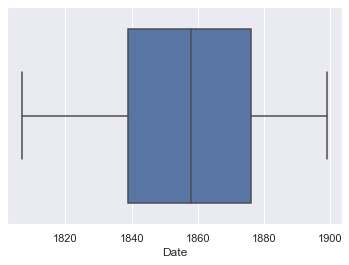

In [71]:
date_boxplot = sns.boxplot(x=bydate['Date'])

In [72]:
fig = date_boxplot.get_figure()
fig.savefig("maygraph/boxplotofDateDistribution.jpg")

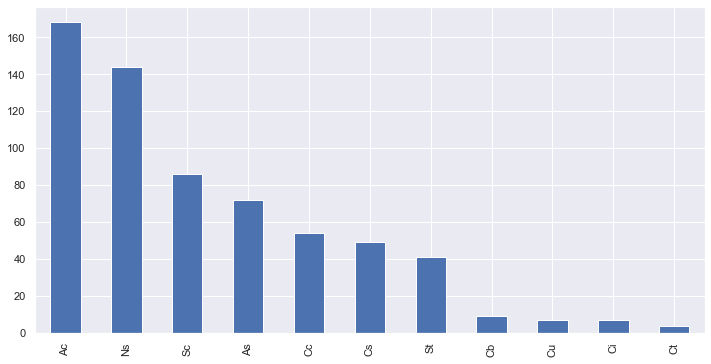

In [64]:
bycloud_bar = bydate["cloud prediction"].value_counts().plot(kind='bar', figsize=(12,6))

In [65]:
fig = bycloud_bar.get_figure()
fig.savefig("maygraph/BarGraphOfCloudPredictions1800-1900.jpg")

[Text(0.5, 1.0, 'Histogram of Counts of Paintings Per Year')]

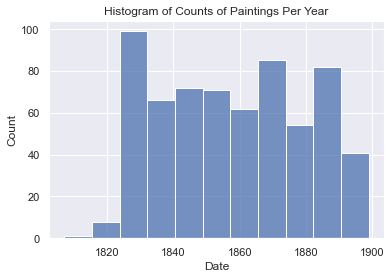

In [66]:
bydate_hist = sns.histplot(bydate['Date'])
bydate_hist.set(title='Histogram of Counts of Paintings Per Year')

In [67]:
fig = bydate_hist.get_figure()
fig.savefig("maygraph/CountsOfPaintingsByYear.jpg")

[Text(0.5, 1.0, 'Scatter Plot of Artist Paintings by Year')]

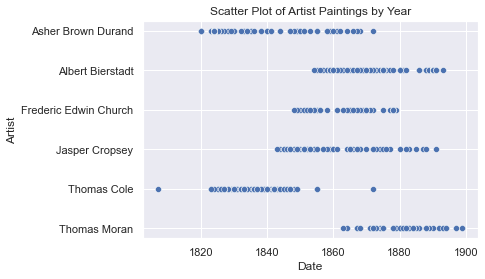

In [73]:
scatter = sns.scatterplot(x=bydate["Date"],y=bydate["Artist"])
scatter.set(title='Scatter Plot of Artist Paintings by Year')

In [74]:
fig = scatter.get_figure()
fig.savefig("maygraph/ScatterofArtistbyYear.jpg")

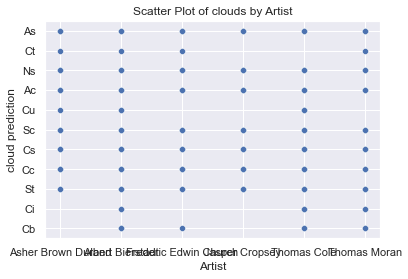

In [76]:
scatter = sns.scatterplot(x=bydate["Artist"],y=bydate["cloud prediction"])
scatter.set(title='Scatter Plot of clouds by Artist')
fig = scatter.get_figure()
fig.savefig("maygraph/ScatterofcloudsbyArtist.jpg")

In [77]:
from mpl_toolkits import mplot3d

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

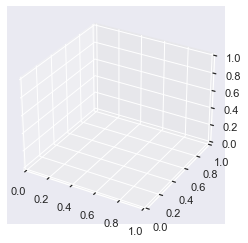

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ValueError: The number of FixedLocator locations (641), usually from a call to set_ticks, does not match the number of ticklabels (6).

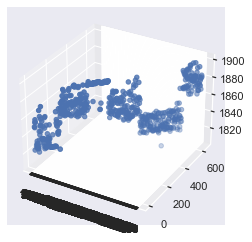

In [86]:
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
xdata = bydate['Artist']
ydata = bydate['cloud prediction']
zdata = bydate['Date']
ax.scatter3D(range(len(xdata)), range(len(ydata)), zdata)
ax.set(xticks=range(len(xdata)), xticklabels="Artist",
       yticks=range(len(ydata)), yticklabels="Cloud Prediction")


/opt/homebrew/Caskroom/miniforge/base/envs/a/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


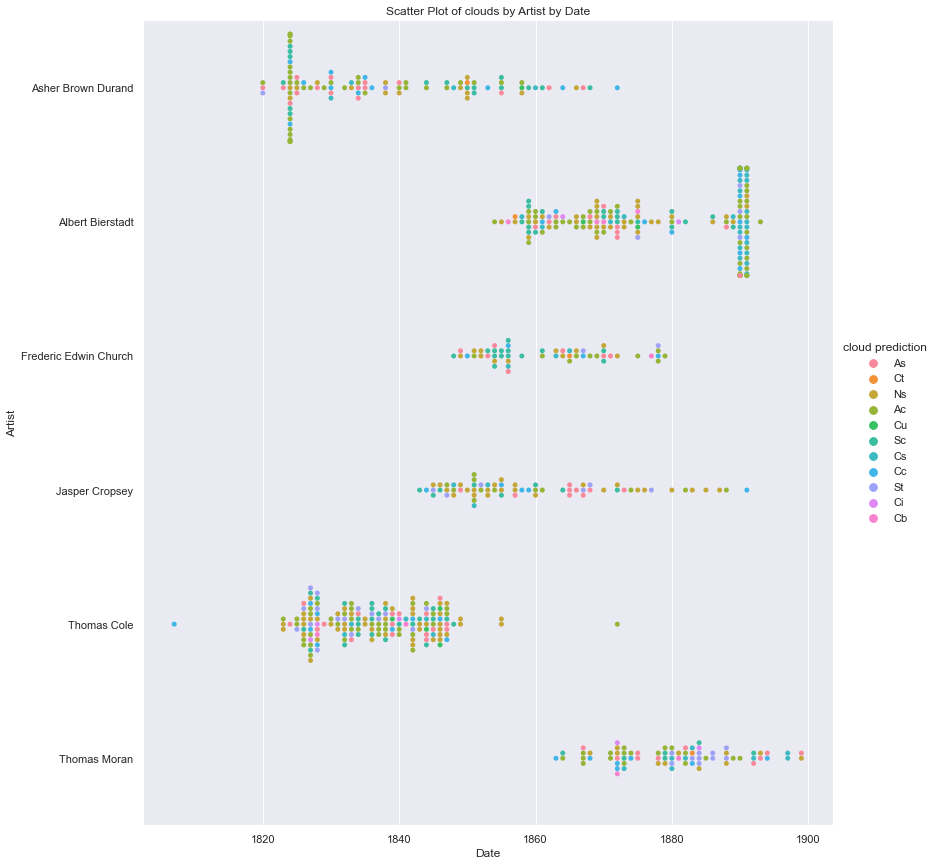

In [11]:
scatter = sns.catplot(x="Date", y="Artist", hue="cloud prediction", kind="swarm", data=bydate, height=12, aspect=1/1)
scatter.set(title='Scatter Plot of clouds by Artist by Date')
fig = scatter.savefig("maygraph/Scatter Plot of clouds by Artist by Date.jpg")

/opt/homebrew/Caskroom/miniforge/base/envs/a/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/a/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/a/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/a/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

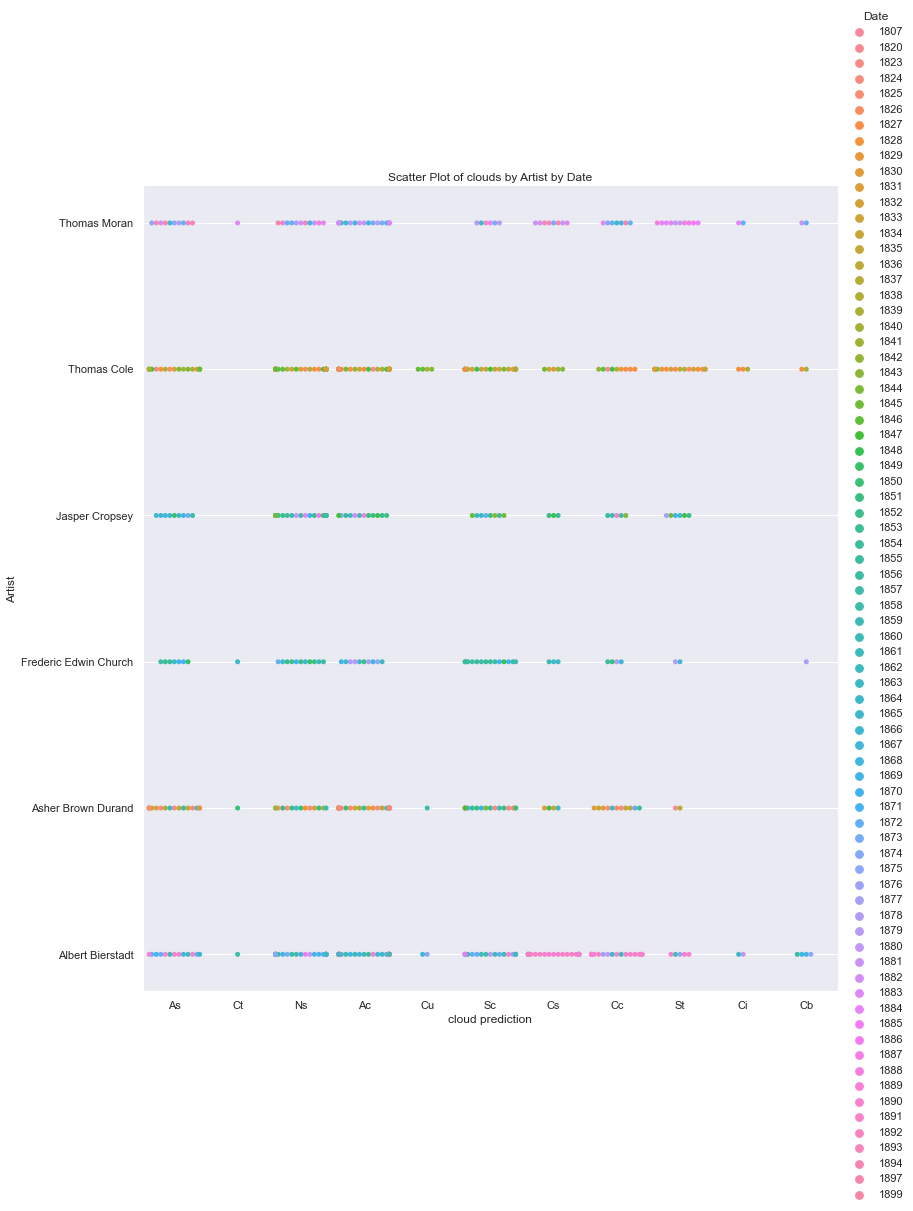

In [12]:
scatter = sns.catplot(x="cloud prediction", y="Artist", hue="Date", kind="swarm", data=bydate, height=12, aspect=1/1)
scatter.set(title='Scatter Plot of clouds by Artist by Date')
fig = scatter.savefig("maygraph/Scatter Plot of clouds by Artist by Date2.jpg")